# Importing data

In [11]:
import pandas as pd

In [12]:
HOUSING_PATH = "../datasets/housing/housing.csv"

In [13]:
def load_housing_data(housing_path=HOUSING_PATH):
    return pd.read_csv(housing_path)

In [15]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [18]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [20]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [21]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [33]:
%matplotlib inline
import matplotlib.pyplot as plt

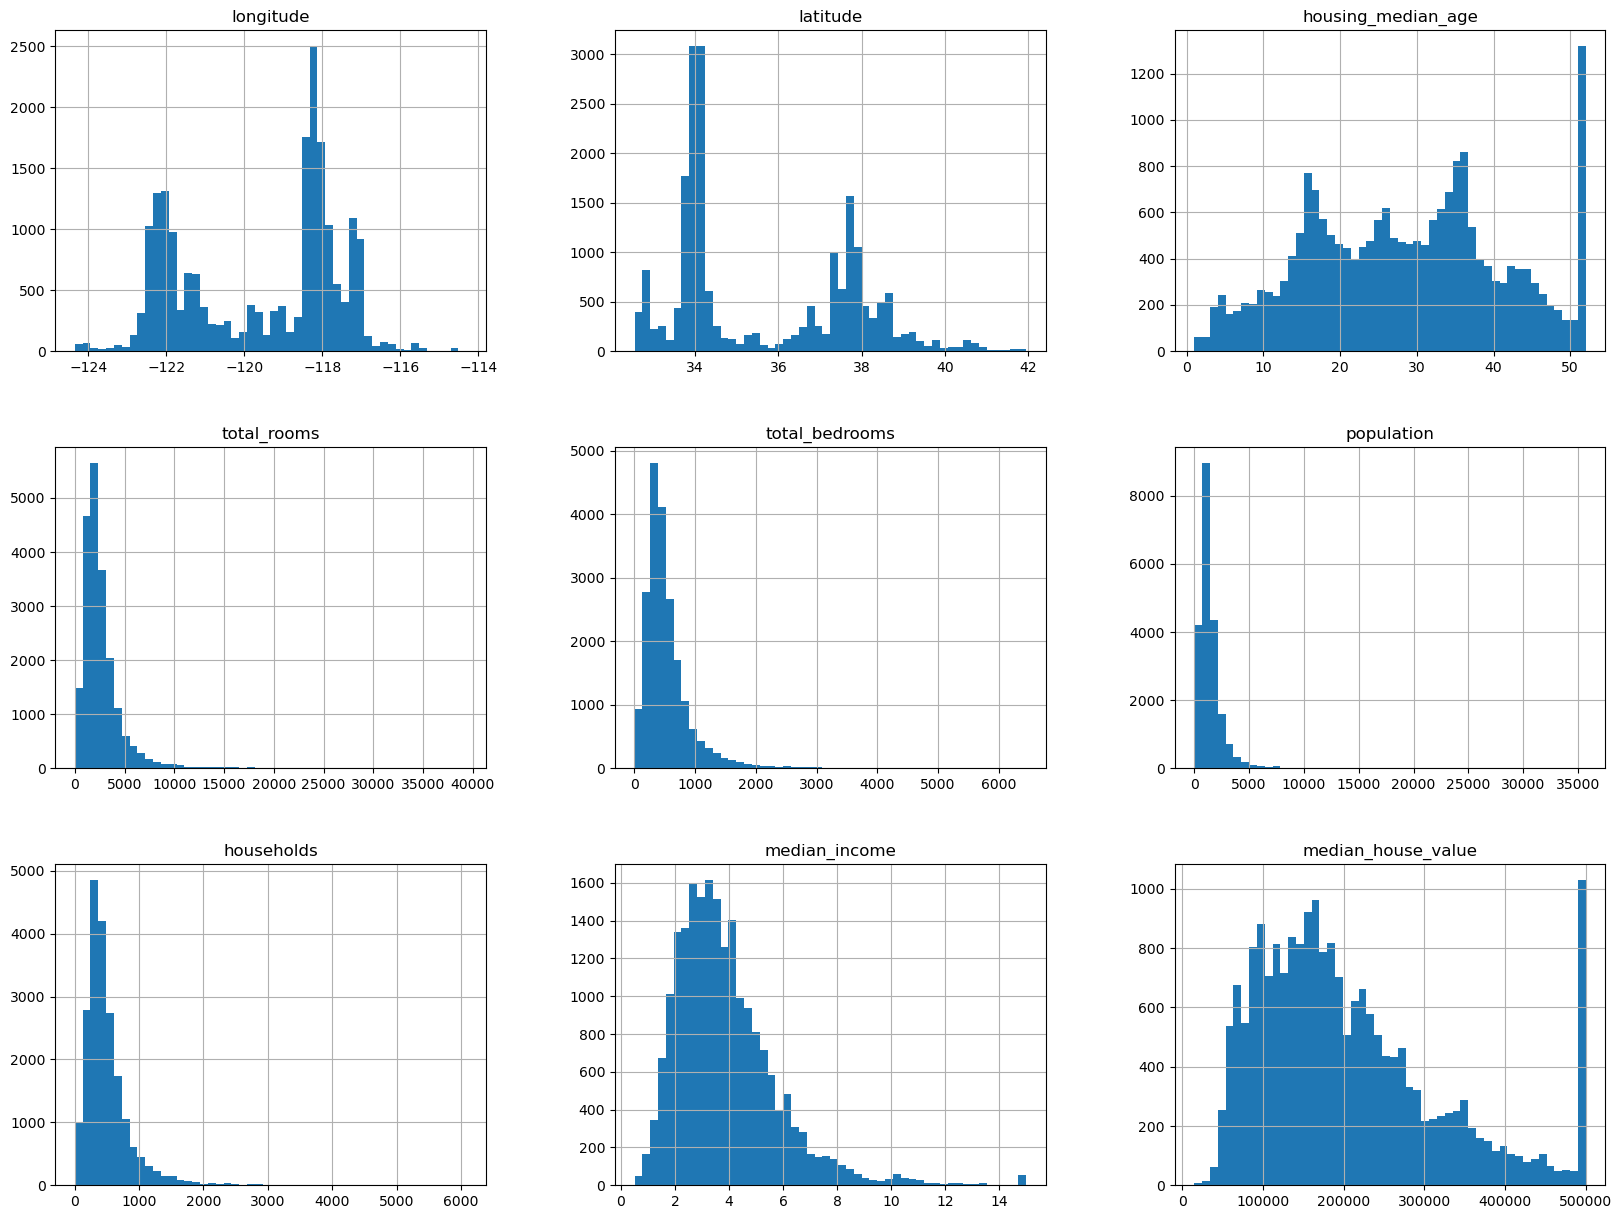

In [36]:
housing.hist(bins=50, figsize=(20, 15))
plt.show()

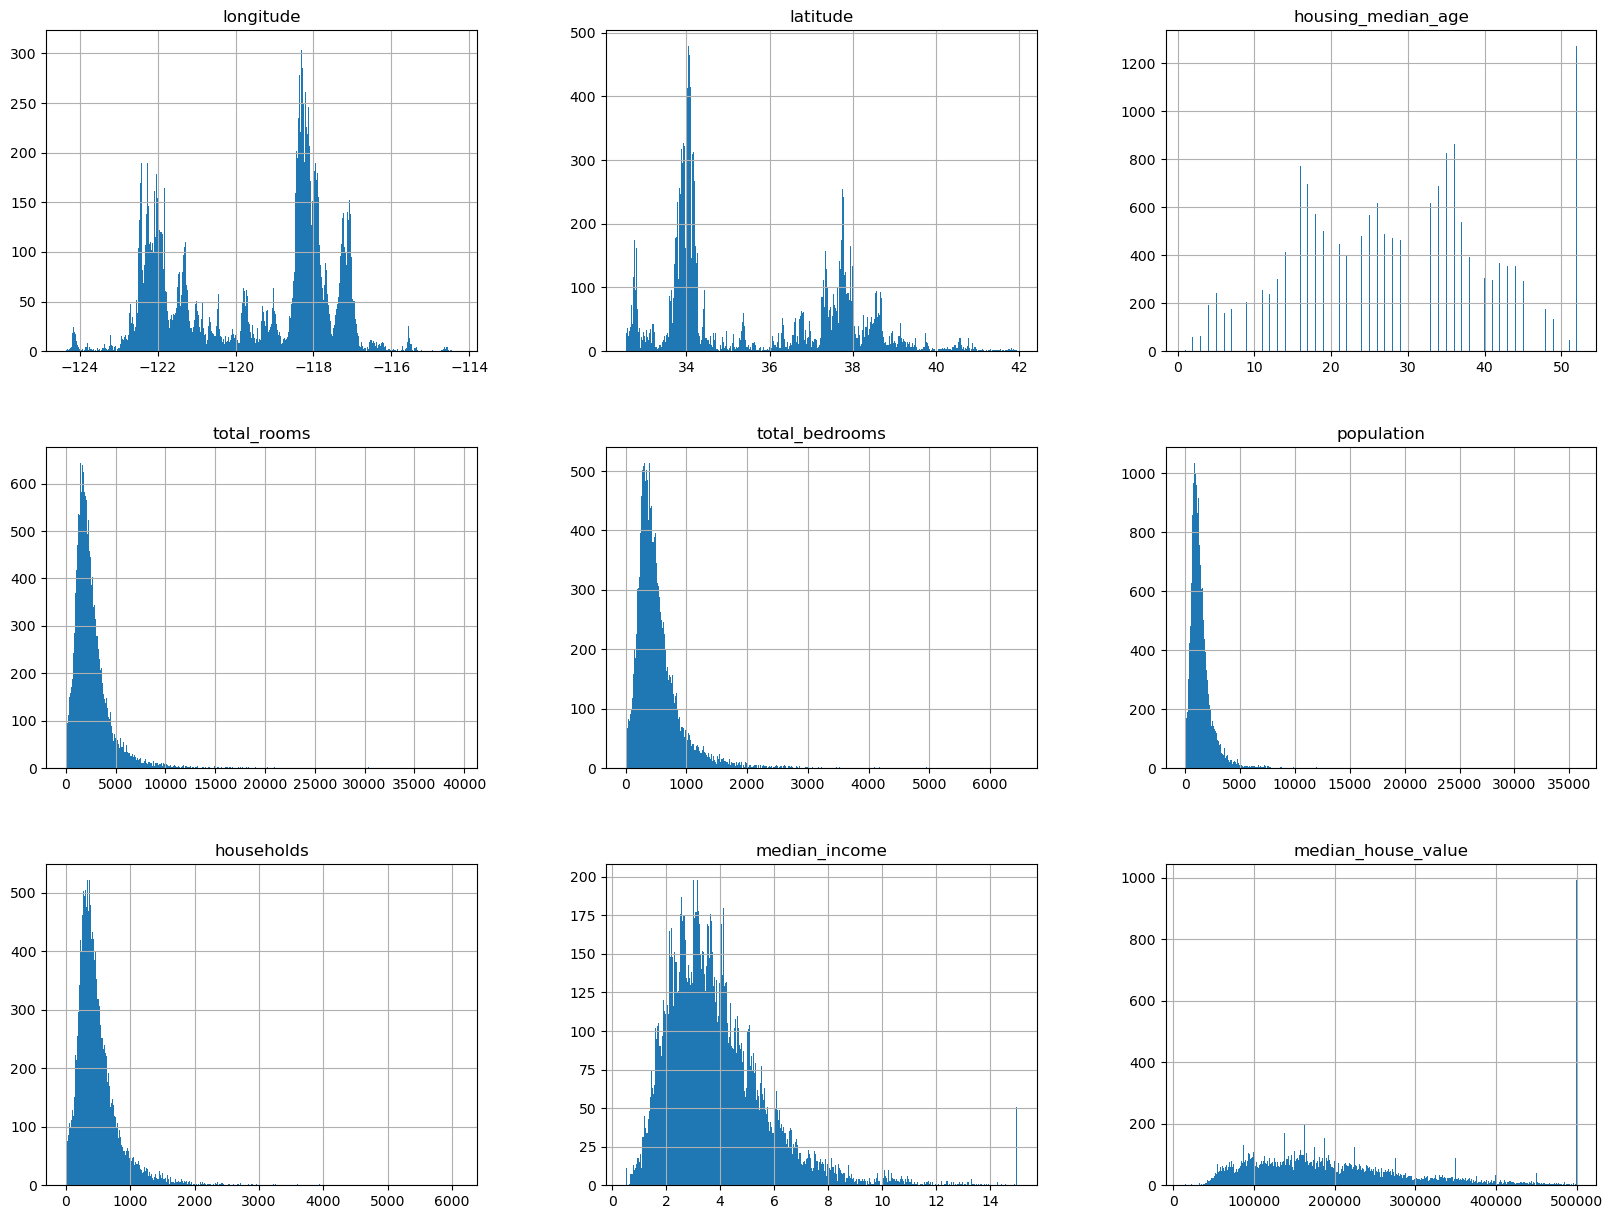

In [38]:
housing.hist(bins=500, figsize=(20, 15))
plt.show()

# Creating Test-Sets and Training-Sets

In [40]:
import numpy as np

## Creating a test set randomly
Creating a test set is theoretically simple: pick some instances randomly, typically 20 % of the dataset (or less for very larg data sets), and set them aside.

This works well  but it is not perfext, if you run it again it will generate a different set. Over time you will get to see the whole dataset which is what you want to avoid.

One solution is to save the test set on the first run and reload it in subsequent runs, Another option is to set the random number generator's seed (e.g. with np.random.seed(42)) before calling np.random.permutation() so that it always generates the same shuffled indices.

In [56]:
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [57]:
train_set, test_set = split_train_test(housing, 0.20)

In [59]:
train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
7540,-118.22,33.91,28.0,1847.0,500.0,2263.0,473.0,1.5161,103200.0,<1H OCEAN
3595,-118.49,34.24,35.0,2707.0,446.0,1224.0,445.0,5.2939,244200.0,<1H OCEAN
3223,-119.68,36.32,28.0,1325.0,276.0,873.0,240.0,2.5833,54400.0,INLAND
19779,-122.19,39.91,39.0,2467.0,529.0,1433.0,502.0,1.8571,53500.0,INLAND
161,-122.25,37.80,52.0,2087.0,510.0,1197.0,488.0,3.0149,218400.0,NEAR BAY


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20,-122.27,37.85,40.0,751.0,184.0,409.0,166.0,1.3578,147500.0,NEAR BAY
21,-122.27,37.85,42.0,1639.0,367.0,929.0,366.0,1.7135,159800.0,NEAR BAY


## Using UID to identify chosen test data

Both the solutions to choose random data will break if the data ever gets updated. A common solution is to use each instance's identifier to decide whether or not it should be included in the test set. For example you could compute the hash of each instance's identifier and put that instance in the test set if the hash is lower than or equal to 20% of the maximum hash value. This will ensure the test set remains consistent across multiple runs, even if you refresh the data set.
The new test set will contain 20% of the new instances, but it will not contain any instance's that was previously in the training set.

In [60]:
from zlib import crc32

In [79]:
def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

In [69]:
def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [80]:
housing_with_id = housing.reset_index()
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

In [81]:
len(train_set)

16512

In [82]:
len(test_set)

4128

## Using Scikit-Learn

Scikit-Learn provides a few functions to split datasets into multiple subsets in various ways. The simpilest is `train_test_split()`, which does pretty much the same thing as the function `split_train_test()`, with a couple of features.
First, there is a `random_state` parameter that allows you to set the random generator seed. Second, you can pass it multiple datasets with identical numbers of rows, and it will split them on the same indicies (this is very useful, for example, if you have a seperate DataFrame for labels)

In [83]:
from sklearn.model_selection import train_test_split

In [84]:
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [85]:
len(train_set)

16512

In [86]:
len(test_set)

4128